>Note: We use normal distribution for noise because it models continuous, symmetric, and random variations effectively, which are common in real-world systems like sensor errors. Distributions like Poisson or Binomial are discrete and fit specific scenarios, e.g., counts or binary events, making them unsuitable for continuous noise modeling.

### Import Librarys

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### Define Parameters

In [8]:
# Initialize parameters
np.random.seed(42)
time_steps = 50
true_state = [0]  # Starting position
velocity = 2  # Constant speed
observation_noise_std = 1.5  # GPS noise
transition_noise_std = 0.5  # Random noise in state transition
observations = []

### Simulation

In [9]:
# Simulate the car's movement and GPS observations
for t in range(time_steps):
    # State transition: true position evolves with some noise
    next_state = true_state[-1] + velocity + np.random.normal(0, transition_noise_std)
    true_state.append(next_state)

    # Observation: Noisy GPS reading of the true position
    observation = next_state + np.random.normal(0, observation_noise_std)
    observations.append(observation)

### Kalaman Filter Implementation

In [10]:
# Kalman Filter Implementation
# Initialize Kalman Filter variables
kalman_estimates = []
estimated_position = 0  # Initial estimate
estimated_error = 1  # Initial estimate error
process_noise = transition_noise_std**2  # Process noise covariance
measurement_noise = observation_noise_std**2  # Measurement noise covariance

In [11]:
for t in range(time_steps):
    # Prediction Step
    predicted_position = estimated_position + velocity
    predicted_error = estimated_error + process_noise

    # Update Step
    kalman_gain = predicted_error / (predicted_error + measurement_noise)
    estimated_position = predicted_position + kalman_gain * (observations[t] - predicted_position)
    estimated_error = (1 - kalman_gain) * predicted_error

    kalman_estimates.append(estimated_position)

### Plot

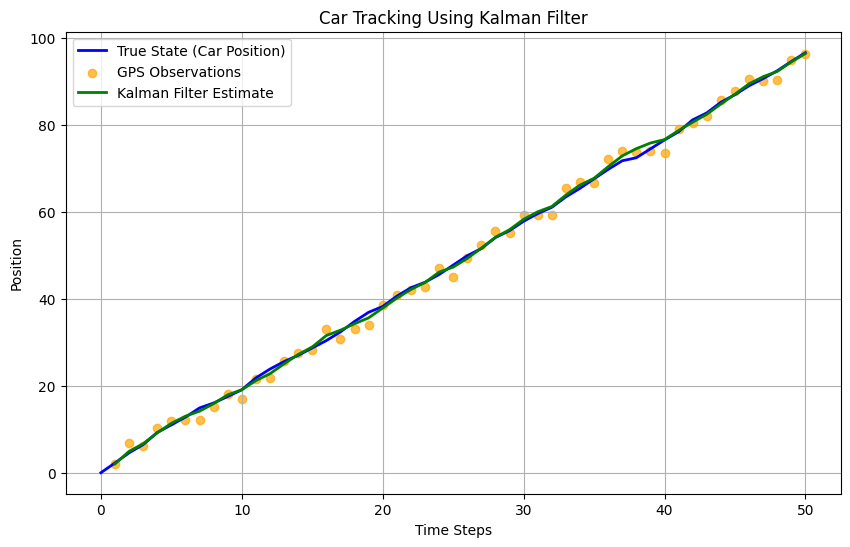

In [12]:
# Plot True State, Observations, and Kalman Filter Estimates
plt.figure(figsize=(10, 6))
plt.plot(range(time_steps + 1), true_state, label="True State (Car Position)", color="blue", linewidth=2)
plt.scatter(range(1, time_steps + 1), observations, label="GPS Observations", color="orange", alpha=0.7)
plt.plot(range(1, time_steps + 1), kalman_estimates, label="Kalman Filter Estimate", color="green", linewidth=2)
plt.title("Car Tracking Using Kalman Filter")
plt.xlabel("Time Steps")
plt.ylabel("Position")
plt.legend()
plt.grid()
plt.show()
